# Standing Waves

This notebook is used for analysis of the provided data for Lab T2-SW, PHYSICS 5BL.

In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': '16'})

# Expt 3: Fixed Tension and Frequency, Varying Length

## Data input

In [2]:
def ssd(sample):
    var = np.var(sample)
    return np.sqrt(var * len(sample) / (len(sample) - 1))

def sem(sample):
    return ssd(sample) / np.sqrt(len(sample))

def paste(arr):
#     print('mean:', np.mean(arr),
#           'sd:', ssd(arr),
#           'sem:', sem(arr))
    print('mean±sem: {m:.3f} ± {e:.3f}'.format(m=np.mean(arr), e=sem(arr)))
    return np.mean(arr), sem(arr)

In [3]:
mean_lengths, length_errors = [], []
n_nodes = [6, 5, 4, 3, 2, 1]

l6 = [127.5, 128.0]
l, e = paste(l6)
mean_lengths += [l]
length_errors += [e]

l5 = [106.2, 107.0, 106.5]
l, e = paste(l5)
mean_lengths += [l]
length_errors += [e]

mean_lengths += [85]
length_errors += [0.2]

l3 = [65, 64.5, 64.5]
l, e = paste(l3)
mean_lengths += [l]
length_errors += [e]

l2 = [43.5, 43.2]
l, e = paste(l2)
mean_lengths += [l]
length_errors += [e]

l1 = [21.8, 22.0]
l, e = paste(l1)
mean_lengths += [l]
length_errors += [e]

print(mean_lengths, length_errors)

mean±sem: 127.750 ± 0.250
mean±sem: 106.567 ± 0.233
mean±sem: 64.667 ± 0.167
mean±sem: 43.350 ± 0.150
mean±sem: 21.900 ± 0.100
[127.75, 106.56666666666666, 85, 64.66666666666667, 43.35, 21.9] [0.25, 0.2333333333333326, 0.2, 0.16666666666666669, 0.14999999999999855, 0.09999999999999964]


In [36]:
x_data, y_data = n_nodes, mean_lengths
y_er = length_errors
y_data = [y / 100 for y in y_data]
y_er = [y / 100 for y in y_er]
print(y_data, y_er)

[1.2775, 1.0656666666666665, 0.85, 0.6466666666666667, 0.4335, 0.21899999999999997] [0.0025, 0.0023333333333333257, 0.002, 0.0016666666666666668, 0.0014999999999999855, 0.0009999999999999966]


## Nonlinear fits
From the theory, we have $n=2fL\sqrt{\frac{\mu}{T}}$; rearranging, we have that $L=\frac{n}{2f}\sqrt{\frac{T}{\mu}}$.

### Define the model:

In [50]:
FREQ = 60 # Hz
T = (0.249 + 0.009) * 9.8 # kg m/s^2

def length_model(nodes, mu):
    """Parameters is mu;
    independent variable is num nodes.
    Returns the length."""
    return nodes / (2 * FREQ) * np.sqrt(T / mu)


### Choose the model and initial fit parameter values then graph:


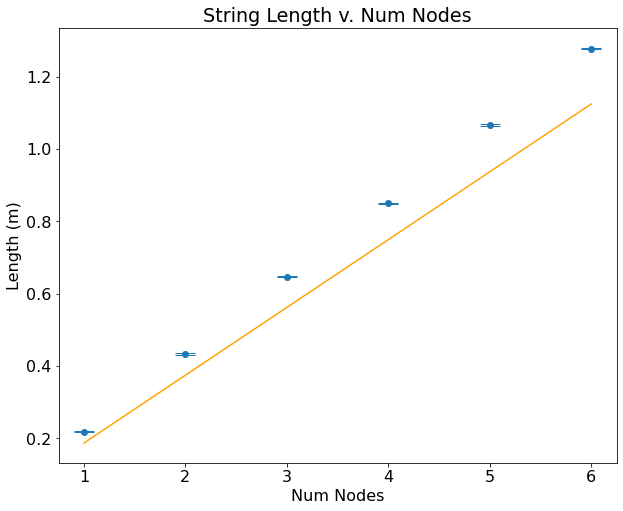

In [51]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
muinit = 0.005

# Graph
space = np.linspace(1, 6, 1000)
plt.plot(space, length_model(space, muinit), color='orange')
plt.scatter(x_data, y_data)
plt.errorbar(x_data, y_data, yerr=y_er, fmt='none', capsize=10)
plt.xlabel('Num Nodes')
plt.ylabel('Length (m)')
plt.title('String Length v. Num Nodes')
plt.show()

## Perform the fit then plot

In [52]:
# Perform the fit
start_pars = [muinit]
pars, cov = opt.curve_fit(length_model, x_data, y_data, p0=start_pars, sigma=y_er, absolute_sigma=True)

[MU] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[3.83630356e-03 7.94632634e-06]]


In [53]:
# Values predicted from fit
ypred = length_model(space, MU)

In [54]:
# Calculating the chisq (*not reduced*)
def chisq(predicted, observed, errors):
    res = np.array(observed)-np.array(predicted)
    print(res, errors)
    norm_res = res / errors
    return np.sum(norm_res**2)

y_pred = [length_model(n, MU) for n in range(6, 0, -1)]
print(y_pred)
print(y_data)

chi2_prop = chisq(y_pred, y_data, y_er)

print('χ2 ={0:.3f}'.format (chi2_prop))

red_chi2 = chi2_prop / 5

[1.2836198152657579, 1.0696831793881314, 0.8557465435105053, 0.6418099076328789, 0.42787327175525264, 0.21393663587762632]
[1.2775, 1.0656666666666665, 0.85, 0.6466666666666667, 0.4335, 0.21899999999999997]
[-0.00611982 -0.00401651 -0.00574654  0.00485676  0.00562673  0.00506336] [0.0025, 0.0023333333333333257, 0.002, 0.0016666666666666668, 0.0014999999999999855, 0.0009999999999999966]
χ2 =65.412


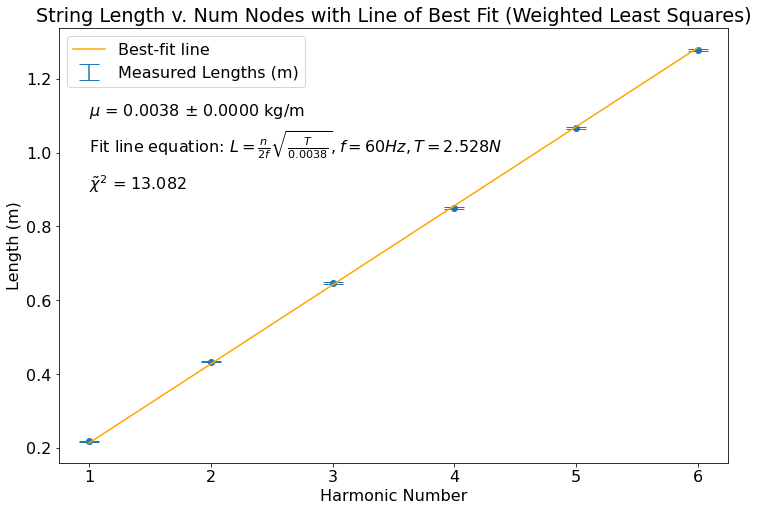

In [55]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data)
plt.errorbar(x_data, y_data, yerr=y_er, fmt='none', capsize=10, label='Measured Lengths (m)')
plt.plot(space, ypred, color='orange', label='Best-fit line')

# Axes label and title
plt.legend()
plt.xlabel('Harmonic Number')
plt.ylabel('Length (m)')
plt.title('String Length v. Num Nodes with Line of Best Fit (Weighted Least Squares)')



# Text
plt.text(1,1.1, "$\\mu$ = %5.4f \u00b1 %5.4f kg/m" % (pars[0], std_errs[0]))
plt.text(1,1, "Fit line equation: $L=\\frac{n}{2f}\\sqrt{\\frac{T}{%5.4f}}, f=%2.0f Hz, T=%5.3f N$" %
         (pars[0], FREQ, T))
plt.text(1, 0.9, "$\\tilde{\\chi}^2$ = %5.3f" % red_chi2)

plt.savefig('fig-wlsq-with-string.png')

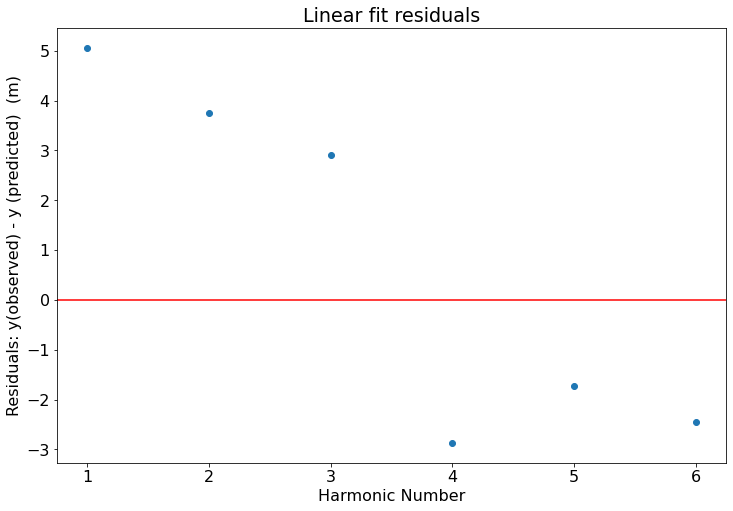

In [46]:
# Residuals plot

# Residuals
r_lin = (np.array(y_data) - np.array(y_pred)) / np.array(y_er)

# Sets figure size etc.
plt.figure(figsize=(12, 8))

# Residuals
plt.errorbar(x_data, r_lin, fmt='o')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Linear fit residuals")
plt.xlabel("Harmonic Number")
plt.ylabel("Residuals: y(observed) - y (predicted)  (m)")
# plt.show()
plt.savefig('fig-resid.png')